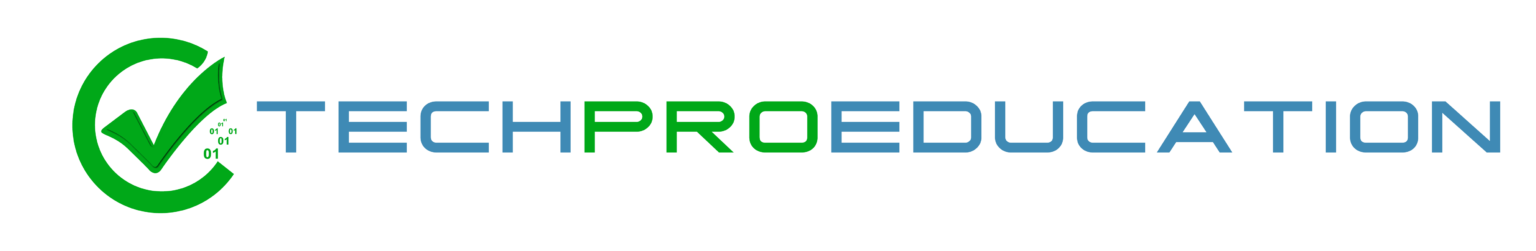

# Hand Written Digits Project

Data reference link : https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits

# Import Libraries

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,f1_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError, ROCAUC
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

# Exploratory Data Analysis and Visualization

In [91]:
df = pd.read_csv("pendigits_txt.csv")
df.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [92]:
df.shape

(10992, 17)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   input1   10992 non-null  int64
 1   input2   10992 non-null  int64
 2   input3   10992 non-null  int64
 3   input4   10992 non-null  int64
 4   input5   10992 non-null  int64
 5   input6   10992 non-null  int64
 6   input7   10992 non-null  int64
 7   input8   10992 non-null  int64
 8   input9   10992 non-null  int64
 9   input10  10992 non-null  int64
 10  input11  10992 non-null  int64
 11  input12  10992 non-null  int64
 12  input13  10992 non-null  int64
 13  input14  10992 non-null  int64
 14  input15  10992 non-null  int64
 15  input16  10992 non-null  int64
 16  class    10992 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [94]:
df.isnull().any()

input1     False
input2     False
input3     False
input4     False
input5     False
input6     False
input7     False
input8     False
input9     False
input10    False
input11    False
input12    False
input13    False
input14    False
input15    False
input16    False
class      False
dtype: bool

In [95]:
df.duplicated().sum() 

0

In [96]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
input1,10992.0,38.814320,34.257783,0.0,6.0,32.0,65.0,100.0
input2,10992.0,85.120269,16.218571,0.0,76.0,89.0,100.0,100.0
input3,10992.0,40.605622,26.342984,0.0,20.0,40.0,58.0,100.0
input4,10992.0,83.774199,19.163646,0.0,72.0,91.0,100.0,100.0
input5,10992.0,49.770378,34.100515,0.0,18.0,53.0,78.0,100.0
input6,10992.0,65.573144,26.996688,0.0,49.0,71.0,86.0,100.0
input7,10992.0,51.220251,30.576881,0.0,28.0,53.5,74.0,100.0
input8,10992.0,44.498999,29.906104,0.0,23.0,43.0,64.0,100.0
input9,10992.0,56.868541,34.135530,0.0,29.0,60.0,89.0,100.0
input10,10992.0,33.695961,27.251548,0.0,7.0,33.0,54.0,100.0


In [97]:
df["class"].value_counts()

2    1144
4    1144
1    1143
0    1143
7    1142
6    1056
8    1055
5    1055
9    1055
3    1055
Name: class, dtype: int64

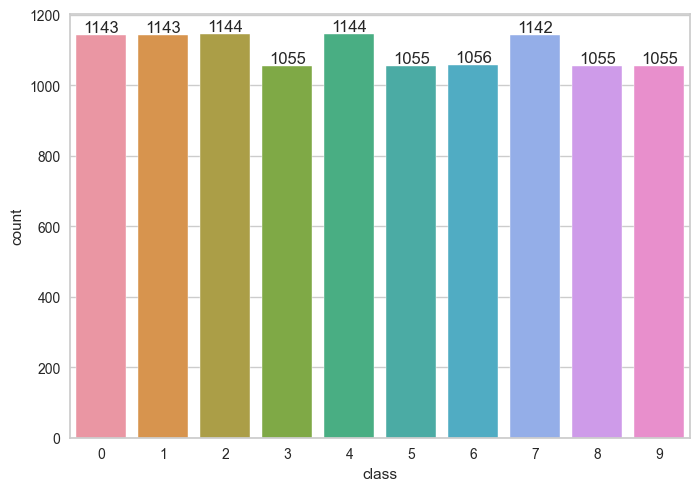

In [98]:
ax= sns.countplot(df["class"])
ax.bar_label(ax.containers[0]); 

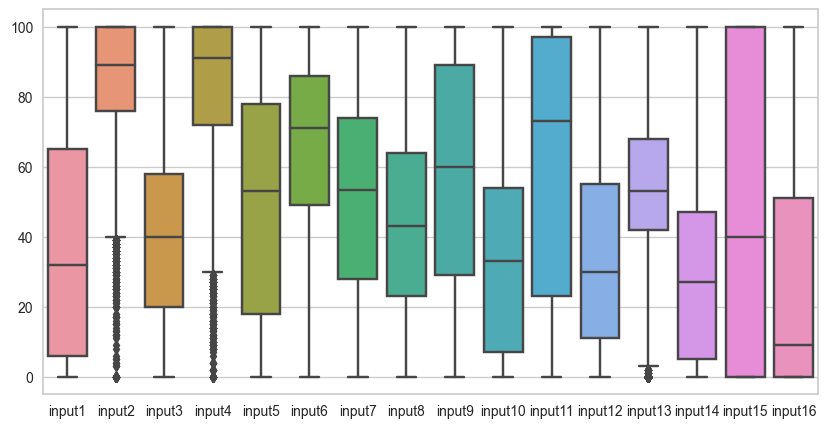

In [99]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df.drop("class", axis=1));

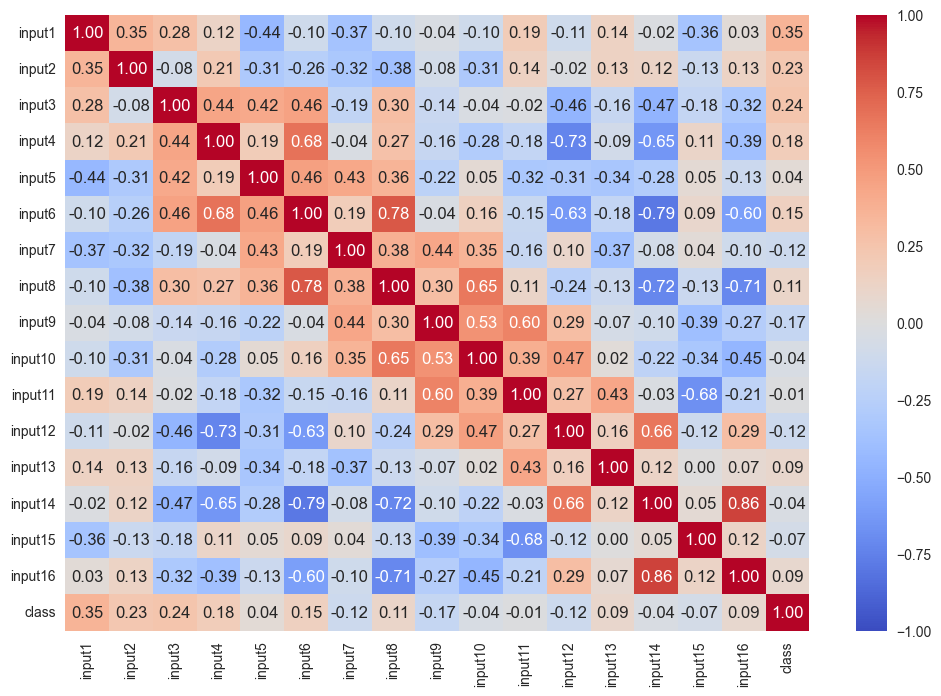

In [100]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),vmin=-1,vmax=1, annot=True, fmt='.2f', cmap='coolwarm');

# Data Preprocessing

In [101]:
X = df.drop("class", axis = 1)
y = df["class"]

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [103]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

# Random Forest Classifier

In [104]:
rf_model = RandomForestClassifier(random_state=101,n_estimators=100)
rf_model.fit(X_train,y_train)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[266   0   0   0   0   0   0   0   6   0]
 [  0 274  16   0   1   0   0   1   0   0]
 [  0   4 289   0   0   0   0   1   0   0]
 [  0   1   0 277   0   0   0   0   0   0]
 [  0   0   0   0 290   0   0   0   0   0]
 [  0   0   0   3   0 260   0   0   1   3]
 [  0   0   0   0   0   0 264   0   0   0]
 [  0   4   1   0   0   0   0 264   0   0]
 [  0   0   0   0   0   0   0   0 256   0]
 [  0   0   0   1   0   0   0   2   1 262]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       272
           1       0.97      0.94      0.95       292
           2       0.94      0.98      0.96       294
           3       0.99      1.00      0.99       278
           4       1.00      1.00      1.00       290
           5       1.00      0.97      0.99       267
           6       1.00      1.00      1.00       264
           7       0.99      0.98      0.98       269
           8       0.97      1.00      0.98       256
           9       

In [105]:
model = RandomForestClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.989324
test_precision_micro    0.989324
test_recall_micro       0.989324
test_f1_micro           0.989324
dtype: float64

In [106]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = rf_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

,Feature Importance
input16,0.113422
input14,0.096896
input15,0.074121
input11,0.072969
input10,0.071047
input5,0.067171
input8,0.064961
input9,0.063931
input6,0.057943
input1,0.057708


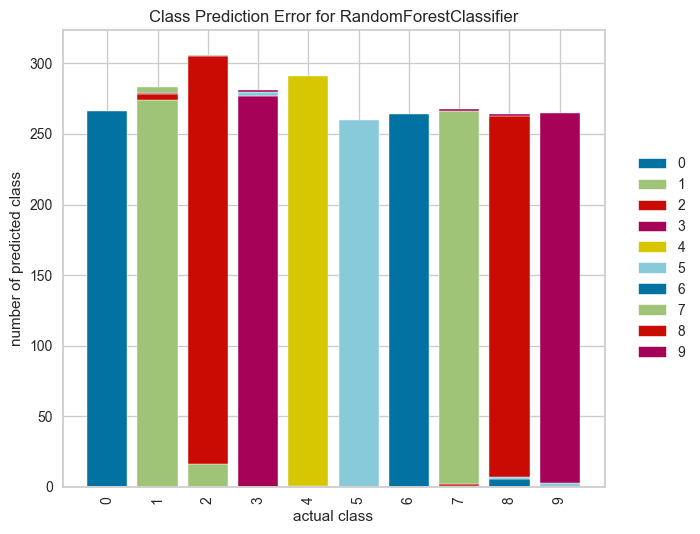

In [107]:
visualizer = ClassPredictionError(model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

## RF GridsearchCV

In [108]:
param_grid = {
             'criterion': ["entropy","gini"],
             'max_depth':[7,8],
             'max_features':['auto', 0.8],
             'max_leaf_nodes': [180,200],
             'n_estimators':[50,100],
             }

In [109]:
rf_model = RandomForestClassifier()
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=2,
                             scoring="accuracy",
                             n_jobs=-1)

rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [7, 8],
                         'max_features': ['auto', 0.8],
                         'max_leaf_nodes': [180, 200],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [110]:
rf_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 0.8,
 'max_leaf_nodes': 200,
 'n_estimators': 100}

In [111]:
y_pred_test = rf_grid_model.predict(X_test)
y_pred_train = rf_grid_model.predict(X_train)

In [112]:
rfc_accuracy_test = accuracy_score(y_test, y_pred_test)
rfc_accuracy_train = accuracy_score(y_train, y_pred_train)

rfc_f1_test = f1_score(y_test, y_pred_test, average='macro')
rfc_f1_train = f1_score(y_train, y_pred_train, average='macro')

rfc_accuracy_test, rfc_accuracy_train, rfc_f1_test, rfc_f1_train

(0.9748908296943232,
 0.9934497816593887,
 0.9752492306997663,
 0.9934357152603134)

In [113]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[269   0   0   0   0   0   0   0   3   0]
 [  0 271  19   0   1   0   0   1   0   0]
 [  0   4 287   1   0   0   0   2   0   0]
 [  0   2   0 275   0   1   0   0   0   0]
 [  0   0   0   0 289   0   0   0   0   1]
 [  0   0   0   6   0 254   0   0   0   7]
 [  0   0   0   0   0   1 262   0   1   0]
 [  0   5   2   2   0   0   0 259   1   0]
 [  2   0   0   0   0   0   0   0 254   0]
 [  0   1   0   2   0   1   0   2   1 259]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       272
           1       0.96      0.93      0.94       292
           2       0.93      0.98      0.95       294
           3       0.96      0.99      0.98       278
           4       1.00      1.00      1.00       290
           5       0.99      0.95      0.97       267
           6       1.00      0.99      1.00       264
           7       0.98      0.96      0.97       269
           8       0.98      0.99      0.98       256
           9       

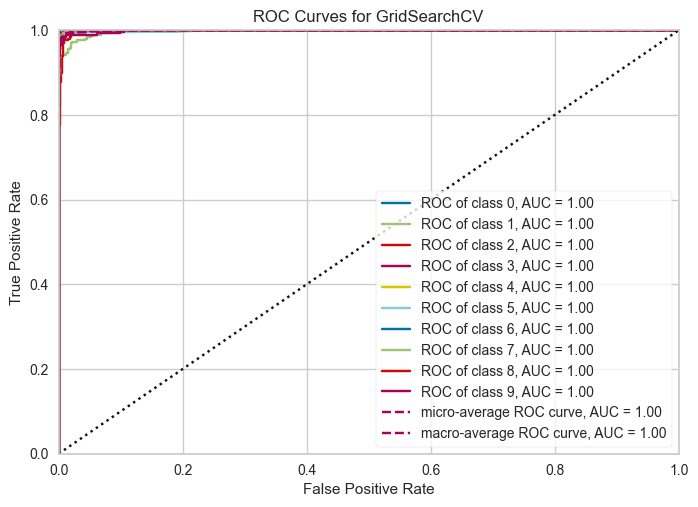

In [114]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(rf_grid_model, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                       # Finalize and render the figure

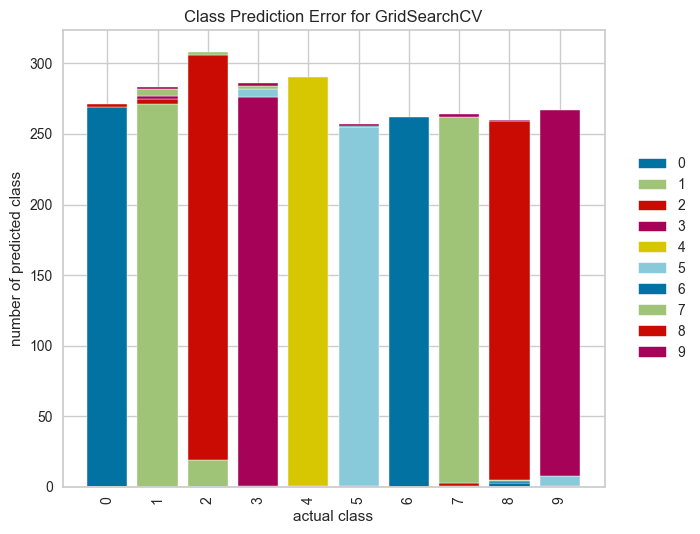

In [115]:
visualizer = ClassPredictionError(rf_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

# Support Vector Machine (SVM) Classifier

In [116]:
scaler = StandardScaler() 

In [117]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(random_state=42))]
pipe_model = Pipeline(steps=operations)

In [118]:
pipe_model.fit(X_train, y_train)
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[271   0   0   0   0   0   0   0   1   0]
 [  0 286   4   0   1   0   0   1   0   0]
 [  0   1 293   0   0   0   0   0   0   0]
 [  0   0   0 277   0   0   0   0   0   1]
 [  0   0   0   0 290   0   0   0   0   0]
 [  0   0   0   3   0 263   0   0   0   1]
 [  0   0   0   0   0   0 264   0   0   0]
 [  0   1   2   0   0   0   0 266   0   0]
 [  0   0   0   0   0   1   0   0 255   0]
 [  0   1   0   0   0   1   0   3   1 260]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       272
           1       0.99      0.98      0.98       292
           2       0.98      1.00      0.99       294
           3       0.99      1.00      0.99       278
           4       1.00      1.00      1.00       290
           5       0.99      0.99      0.99       267
           6       1.00      1.00      1.00       264
           7       0.99      0.99      0.99       269
           8       0.99      1.00      0.99       256
           9       

In [119]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(random_state=42))]
pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, X_train, y_train, scoring = ['accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.994056
dtype: float64

## SVC GridsearchCV

In [120]:
param_grid = {'SVM__C':np.linspace(1, 1.3, 10),
              'SVM__gamma':["scale", "auto"]
             }

In [121]:
model = Pipeline([("scaler",scaler),("SVM", SVC(kernel="rbf"))]) 

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=2,
                              scoring="accuracy",
                              n_jobs=-1)

svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVM', SVC())]),
             n_jobs=-1,
             param_grid={'SVM__C': array([1.        , 1.03333333, 1.06666667, 1.1       , 1.13333333,
       1.16666667, 1.2       , 1.23333333, 1.26666667, 1.3       ]),
                         'SVM__gamma': ['scale', 'auto']},
             scoring='accuracy', verbose=2)

In [122]:
svm_model_grid.best_params_

{'SVM__C': 1.3, 'SVM__gamma': 'scale'}

In [123]:
svm_model_grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('SVM', SVC(C=1.3))])

In [124]:
svm_model_grid.best_score_

0.9942981771829942

In [125]:
y_pred_test = svm_model_grid.predict(X_test)
y_pred_train = svm_model_grid.predict(X_train)

In [126]:
SVM_accuracy_test = accuracy_score(y_test, y_pred_test)
SVM_accuracy_train = accuracy_score(y_train, y_pred_train)

svm_f1_test = f1_score(y_test, y_pred_test, average='macro')
svm_f1_train = f1_score(y_train, y_pred_train, average='macro')

SVM_accuracy_test, SVM_accuracy_train, svm_f1_test, svm_f1_train

(0.9919941775836972, 0.9968461911693353, 0.9920123233750504, 0.996828992143078)

In [127]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[271   0   0   0   0   0   0   0   1   0]
 [  0 287   3   0   1   0   0   1   0   0]
 [  0   1 293   0   0   0   0   0   0   0]
 [  0   0   0 277   0   0   0   0   0   1]
 [  0   0   0   0 290   0   0   0   0   0]
 [  0   0   0   3   0 263   0   0   0   1]
 [  0   0   0   0   0   0 264   0   0   0]
 [  0   1   2   0   0   0   0 266   0   0]
 [  0   0   0   0   0   1   0   0 255   0]
 [  0   1   0   0   0   1   0   3   1 260]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       272
           1       0.99      0.98      0.99       292
           2       0.98      1.00      0.99       294
           3       0.99      1.00      0.99       278
           4       1.00      1.00      1.00       290
           5       0.99      0.99      0.99       267
           6       1.00      1.00      1.00       264
           7       0.99      0.99      0.99       269
           8       0.99      1.00      0.99       256
           9       

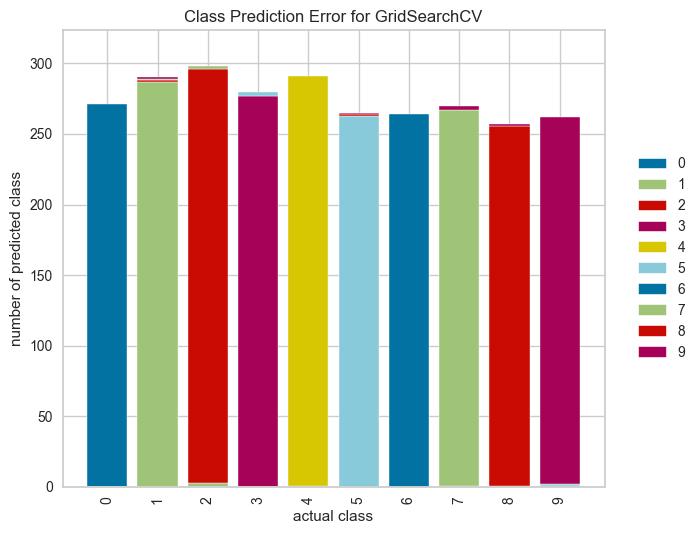

In [128]:
visualizer = ClassPredictionError(svm_model_grid)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

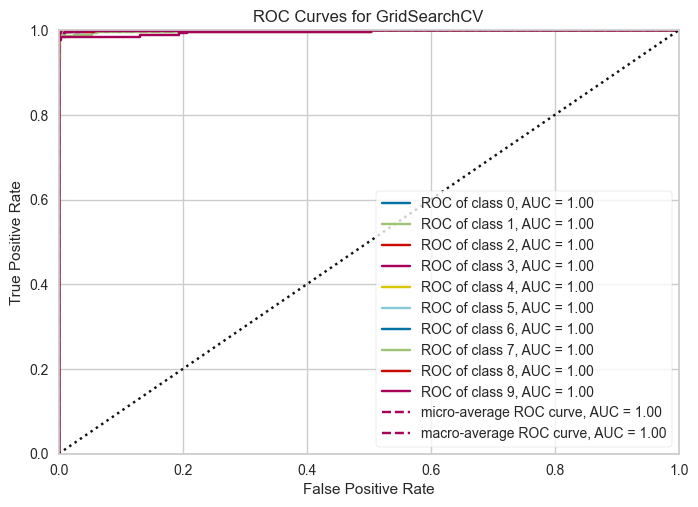

In [129]:
visualizer = ROCAUC(svm_model_grid, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                      # Finalize and render the figure

# Compare The Models

## Accuracy Comparison

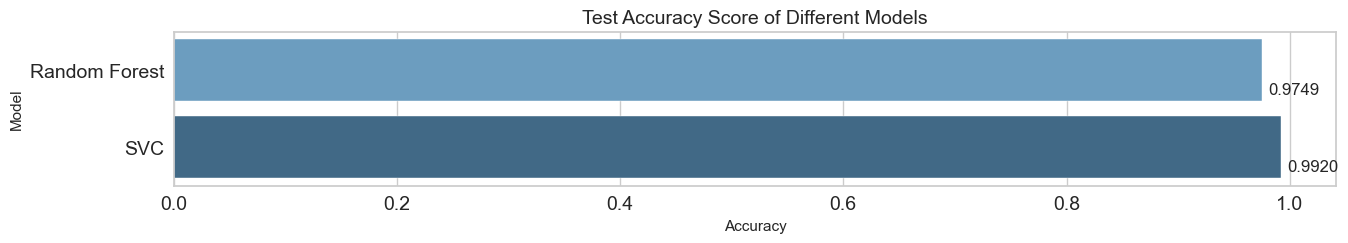

In [132]:
compare = pd.DataFrame({"Model": ["SVC", "Random Forest"],
                        "Accuracy": [SVM_accuracy_test, rfc_accuracy_test]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(15,2))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.9),
                xytext=(5, 10), textcoords='offset points')

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Test Accuracy Score of Different Models", size=14);

## F1 Score Comparison

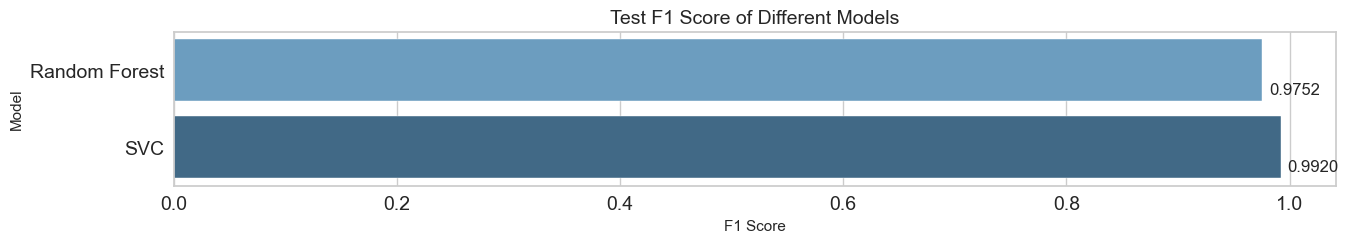

In [133]:
compare = pd.DataFrame({"Model": ["SVC", "Random Forest"],
                        "F1 Score": [svm_f1_test, rfc_f1_test]})

compare = compare.sort_values(by="F1 Score", ascending=True)

plt.figure(figsize=(15,2))
ax = sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + .9),
                xytext=(5, 10), textcoords='offset points')

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Test F1 Score of Different Models", size=14);

Bu datamizda verilerimiz balance sekilde dagildirgi icin ve bunun yaninda multiclass targetimiz oldugundan dolayi accuracy degerlerini dikkate aliyorum. Bundan dolayi Accuracy degeri daha yuksek verdigi icin SVC modelini secerim. Bu model uzerinde tahmin olustururum.